In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_data=pd.read_csv('car_purchasing.csv',encoding='ISO-8859-1')

In [3]:
sales_data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [4]:
sales_data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
len(sales_data)-len(sales_data.drop_duplicates())

0

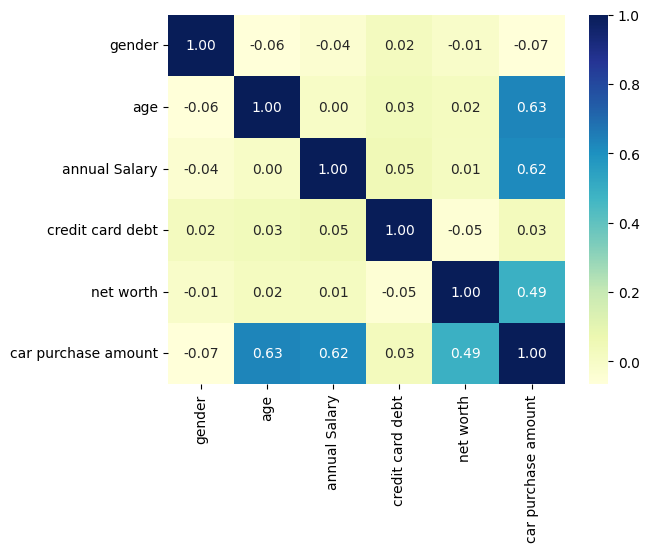

In [7]:
#displaying correlation map to see the correlation between columns of dataset
numeric_data = sales_data.select_dtypes(include=[int, float])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

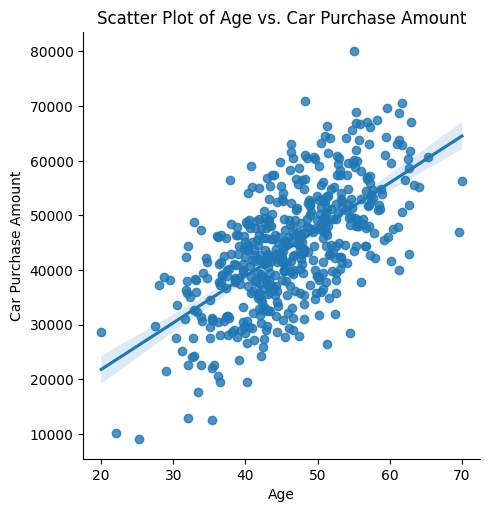

In [8]:
#car purchase trend according to age
sns.lmplot(x='age', y='car purchase amount', data=sales_data)
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Scatter Plot of Age vs. Car Purchase Amount')
plt.show()

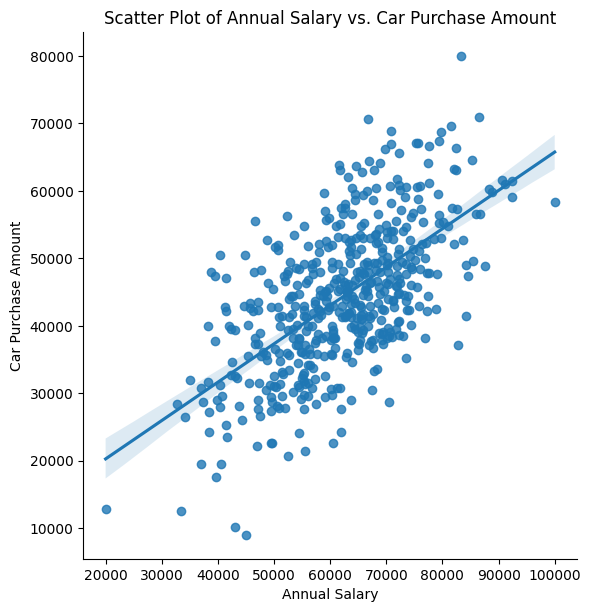

In [9]:
#car purchase trend according to annual salary
sns.lmplot(x='annual Salary', y='car purchase amount', data=sales_data,height=6)
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Scatter Plot of Annual Salary vs. Car Purchase Amount')
plt.show()

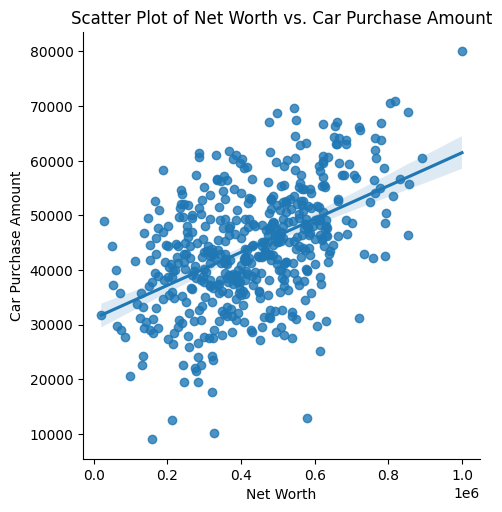

In [10]:
#car purchase trend according to net worth
sns.lmplot(x='net worth', y='car purchase amount', data=sales_data,height=5)
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.show()

In [11]:
#dropping passenger id, name, ticket and cabin column
sales_data = sales_data.drop(['customer name','customer e-mail','country','gender','credit card debt'], axis=1)

In [12]:
sales_data.head()

,age,annual Salary,net worth,car purchase amount
0,41.851720,62812.09301,238961.2505,35321.45877
1,40.870623,66646.89292,530973.9078,45115.52566
2,43.152897,53798.55112,638467.1773,42925.70921
3,58.271369,79370.03798,548599.0524,67422.36313
4,57.313749,59729.15130,560304.0671,55915.46248


In [13]:
#splitting the dataset into 80-20 ratio for training and testing
from sklearn.model_selection import train_test_split

X = sales_data.drop('car purchase amount', axis=1)
y = sales_data['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Selecting the regressor and training the model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#prediction of overall car purchase amount that consumers would spend to purchase car using test data
y_predict = model.predict(X_test)
print(y_predict)

[27588.73622033 53993.7159107  53497.87421855 60223.66540963
 35929.33685593 42371.89157795 49080.25204746 42210.38651939
 34642.81433264 41319.80843223 52151.27945396 39424.18433102
 39412.64304603 27589.73937548 37076.95330375 53848.86956245
 42920.24306036 41027.84070853 38761.88108683 32968.80373718
 45077.65906346 35456.79129485 38170.83134088 38175.0127091
 25251.97362378 34802.25672645 32061.11158545 27887.74010434
 52984.53555443 56613.19094099 57306.65148049 42500.03843329
 33259.8839605  63738.20431145 51940.6421593  30760.81076729
 53022.04568731 68678.84473771 43680.32968439 63081.80114827
 45805.79487745 47985.28515916 31410.32176751 51402.32320165
 48515.29416538 32207.49973043 39550.19156397 35716.74319391
 32608.3934525  49721.80182662 63036.42016146 37257.30382863
 41674.55065655 48956.19243577 44436.92944302 37304.46137106
 27300.95190779 45108.45781301 50442.27718916 28440.03191914
 47609.36158449 60528.45885351 55126.1622068  45804.10449474
 37094.73003606 19552.389

In [15]:
#Checking model's perfomance over test data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1.644446647559014
R-squared (R2) Score: 0.9999999870972689
